##Import and Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report

url = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/flu.csv'
df = pd.read_csv(url)

print("Informasi Dataset:")
print(df.info())
print("\n5 Data Teratas:")
print(df.head())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482 entries, 0 to 1481
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Diagnosis                    1482 non-null   object 
 1   InitialPCRDiagnosis          104 non-null    object 
 2   Age                          1454 non-null   float64
 3   Sex                          1406 non-null   object 
 4   neutrophil                   103 non-null    float64
 5   serumLevelsOfWhiteBloodCell  151 non-null    float64
 6   lymphocytes                  156 non-null    float64
 7   CReactiveProteinLevels       137 non-null    object 
 8   DurationOfIllness            87 non-null     float64
 9   CTscanResults                159 non-null    object 
 10  RiskFactors                  209 non-null    object 
 11  GroundGlassOpacity           93 non-null     object 
 12  Diarrhea                     450 non-null    object 
 13 

##Encoding Fitur Kategorikal

In [3]:
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

##Cek Distribusi Kelas

In [4]:
target = 'Diagnosis'  # ganti dengan nama kolom target sesuai file
print("\nDistribusi Kelas:")
print(df[target].value_counts())


Distribusi Kelas:
Diagnosis
1    1072
0     410
Name: count, dtype: int64


##EDA

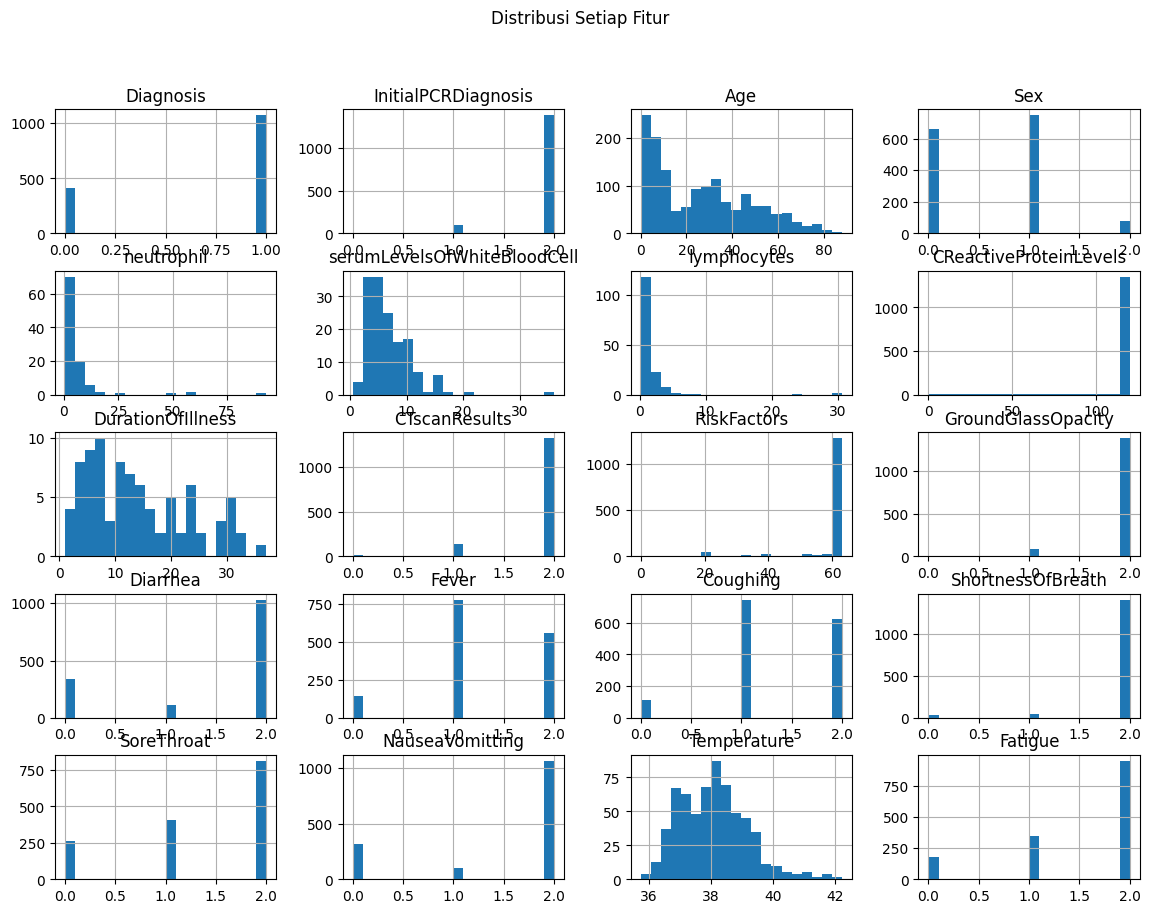

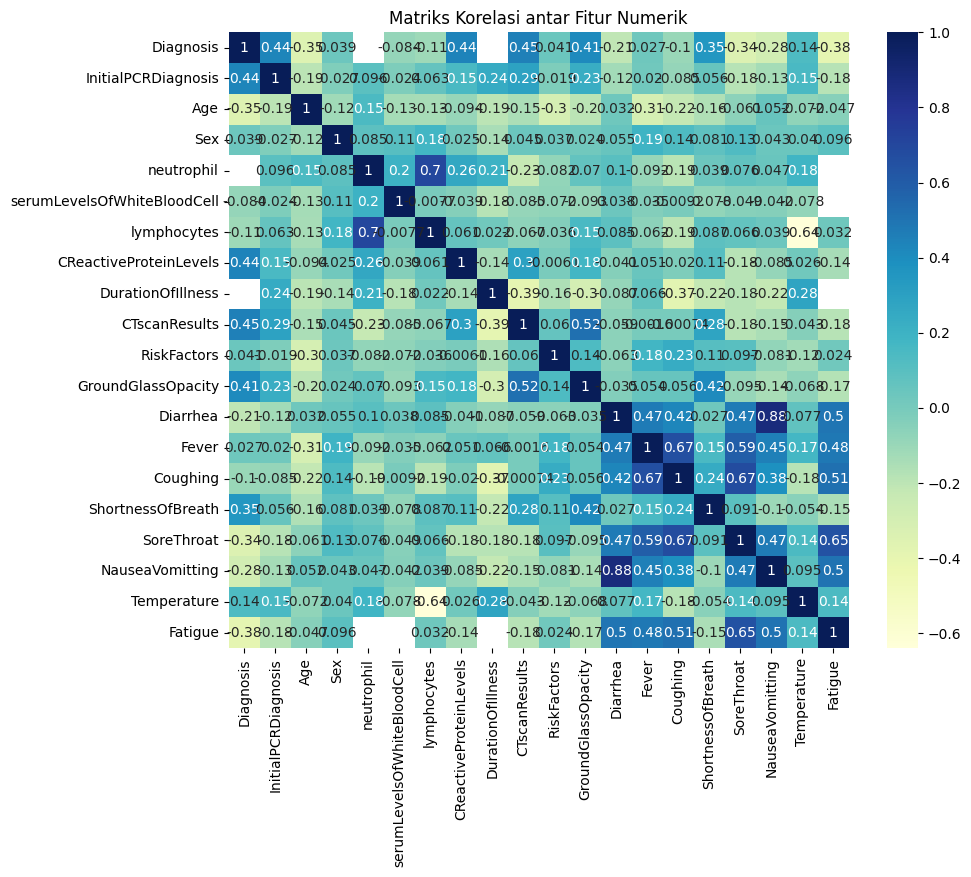

In [5]:
# Histogram
df.hist(bins=20, figsize=(14, 10))
plt.suptitle("Distribusi Setiap Fitur")
plt.show()

# Korelasi antar fitur numerik
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu')
plt.title('Matriks Korelasi antar Fitur Numerik')
plt.show()

##Pembagian Data

In [6]:
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##Model

In [7]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

##Evaluasi Model


Evaluasi Model
Akurasi  : 0.9595959595959596
Presisi  : 0.9665071770334929
Recall   : 0.9758454106280193
F1 Score : 0.9711538461538461
AUC ROC  : 0.9727321524422974


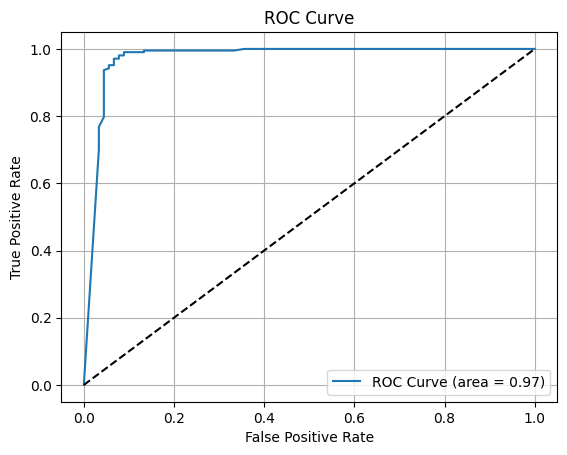

In [10]:
print("\nEvaluasi Model")
print("Akurasi  :", accuracy_score(y_test, y_pred))
print("Presisi  :", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("AUC ROC  :", roc_auc_score(y_test, y_prob))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

##Penjelasan Matematika

###1. **Accuracy**  
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$
Akurasi adalah proporsi prediksi benar dari seluruh data.

###2. **Precision**  
$$
Precision = \frac{TP}{TP + FP}
$$
Presisi mengukur dari semua yang diprediksi positif, berapa banyak yang benar-benar positif.

###3. **Recall (Sensitivity)**  
$$
Recall = \frac{TP}{TP + FN}
$$
Recall mengukur dari semua yang benar-benar positif, berapa banyak yang berhasil ditemukan oleh model.

###4. **F1-Score**  
$$
F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$
F1 adalah harmonisasi antara presisi dan recall.

###5. **AUC (Area Under Curve)**  
AUC adalah luas area di bawah kurva ROC. Nilai AUC antara 0 hingga 1, semakin mendekati 1 maka performa model makin baik.